In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

In [ ]:
!pip install openpyxl

drive.mount('/content/drive')

# Loading the dataset using the appropriate function for Excel files
data = pd.read_excel("/content/drive/MyDrive/BrajT0HinidiiiEnglish/finalDataset.xlsx", engine='openpyxl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,English,Braj
0,I,मैं
1,He,बो
2,She,बो
3,You,तू
4,It,जा


In [ ]:
data.tail()

,English,Braj
1633,Can you lift the box?,का तू डिब्बा उठा पाइगो?
1634,Can you write the exam?,का तू परीक्षा लिख ​​पायेगा?
1635,Did you have lunch?,का तुनै दुपैयर को खानो खायो?
1636,How are you?,तू कैसा है?
1637,I am fine.,मैं अच्छा हूँ.


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2332 (\N{DEVANAGARI LETTER JA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2370 (\N{DEVANAGARI VOWEL SIGN UU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from current font.
  func(*

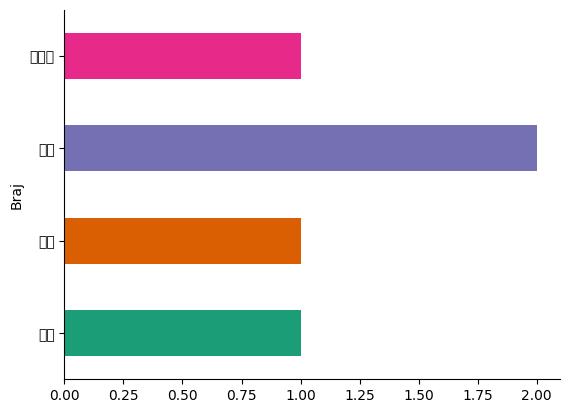

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Braj').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2332 (\N{DEVANAGARI LETTER JA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2370 (\N{DEVANAGARI VOWEL SIGN UU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seab

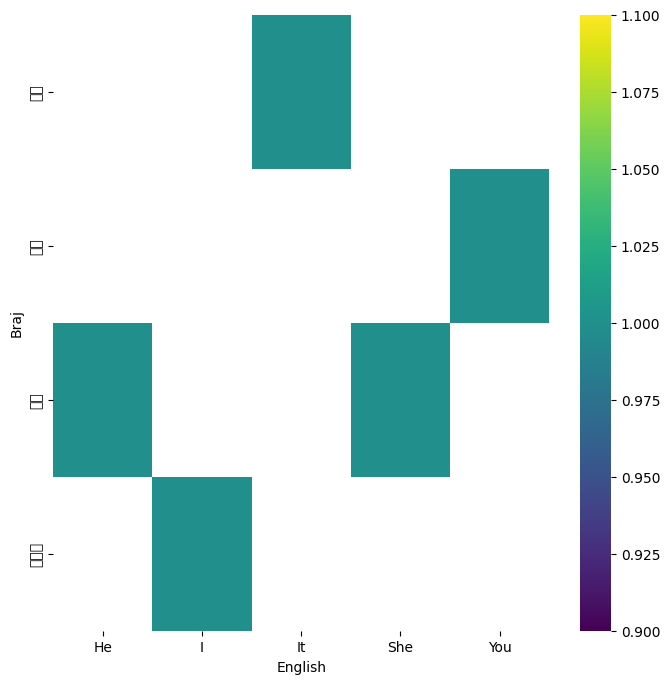

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Braj'].value_counts()
    for x_label, grp in _df_2.groupby('English')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('English')
_ = plt.ylabel('Braj')

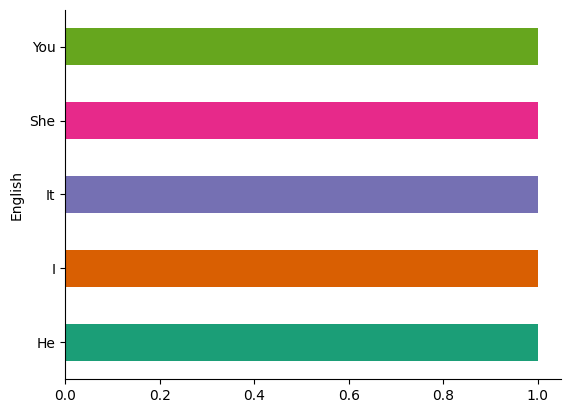

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('English').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  1638 non-null   object
 1   Braj     1638 non-null   object
dtypes: object(2)
memory usage: 25.7+ KB


In [ ]:
# Data Preprocessing and Visualization

# 1. Check for Missing Values
print("Missing values:\n", data.isnull().sum())

Missing values:
 English    0
Braj       0
dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2376 (\N{DEVANAGARI VOWEL SIGN AI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

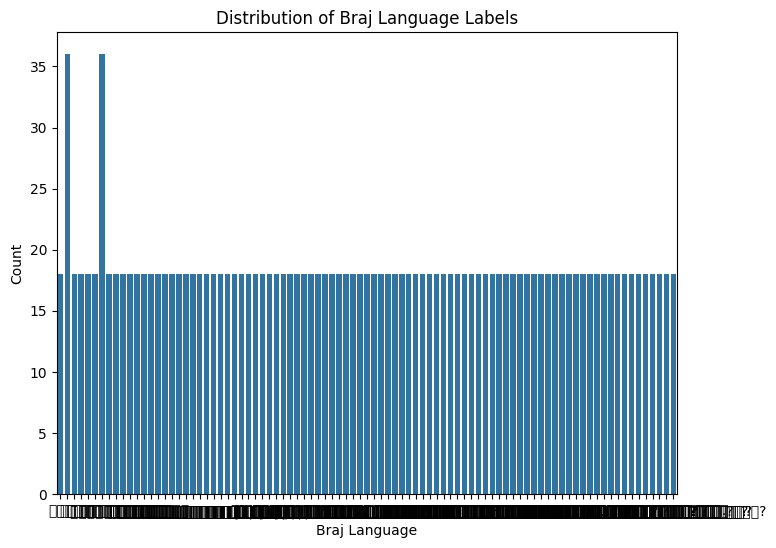

In [ ]:
# 2. Explore the distribution of Braj language labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Braj', data=data)
plt.title('Distribution of Braj Language Labels')
plt.xlabel('Braj Language')
plt.ylabel('Count')
plt.show()

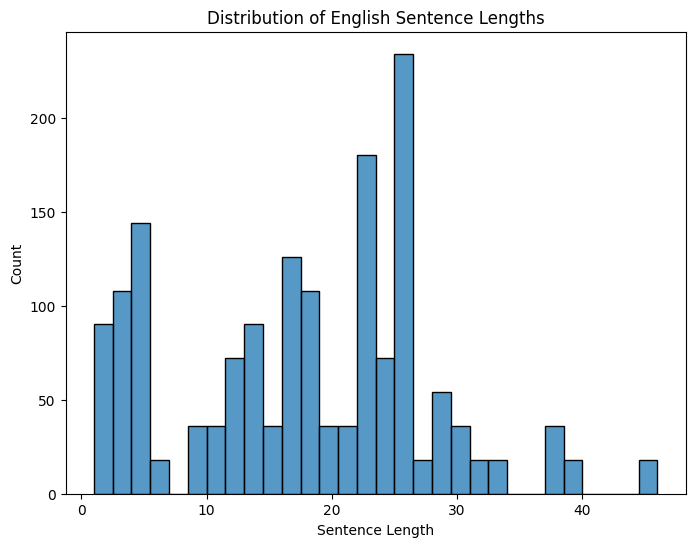

In [ ]:
# 3. Analyze the length of English sentences
data['English_Length'] = data['English'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data['English_Length'], bins=30)
plt.title('Distribution of English Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2376 (\N{DEVANAGARI VOWEL SIGN AI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

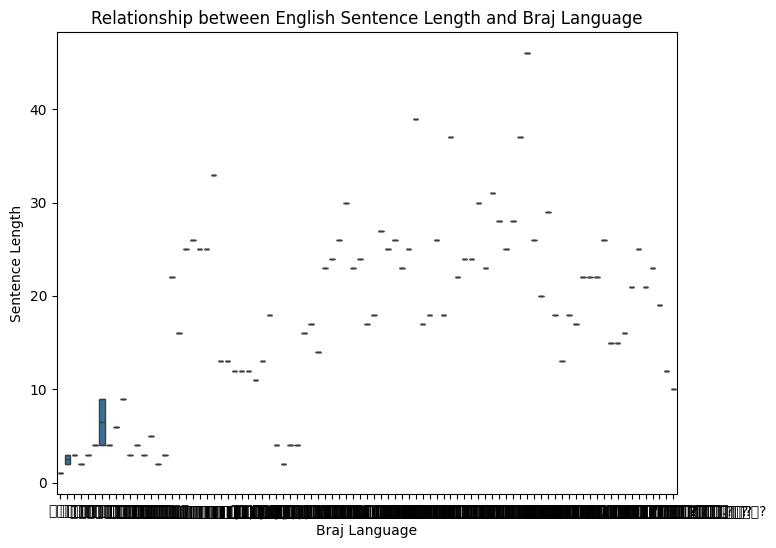

In [ ]:
# 4. Explore the relationship between English sentence length and Braj language
plt.figure(figsize=(8, 6))
sns.boxplot(x='Braj', y='English_Length', data=data)
plt.title('Relationship between English Sentence Length and Braj Language')
plt.xlabel('Braj Language')
plt.ylabel('Sentence Length')
plt.show()

In [ ]:
# Continue with the rest of the code (model training, etc.) as you had it before
X = data["English"]
y = data["Braj"]
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# creating bag of words using countvectorizer

In [ ]:
cv = CountVectorizer()
cv.fit(X_train)

CountVectorizer()

In [ ]:
x_train = cv.transform(X_train).toarray()
x_test  = cv.transform(X_test).toarray()
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Accuracy is :",ac)
print("Confusion Matrix is :\n",cm)
print("Classification report is :\n",cr)

Accuracy is : 0.9298780487804879
Confusion Matrix is :
 [[7 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]
Classification report is :
               precision    recall  f1-score   support

           1       0.54      1.00      0.70         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         4
           7       0.00      0.00      0.00         7
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


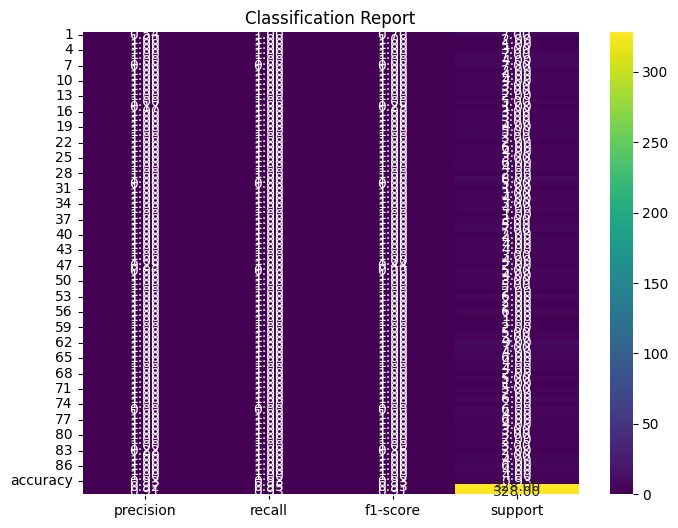

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already calculated y_pred, y_test, and other metrics

# Visualize the classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score', 'support']], annot=True, fmt=".2f", cmap="viridis")
plt.title('Classification Report')
plt.show()


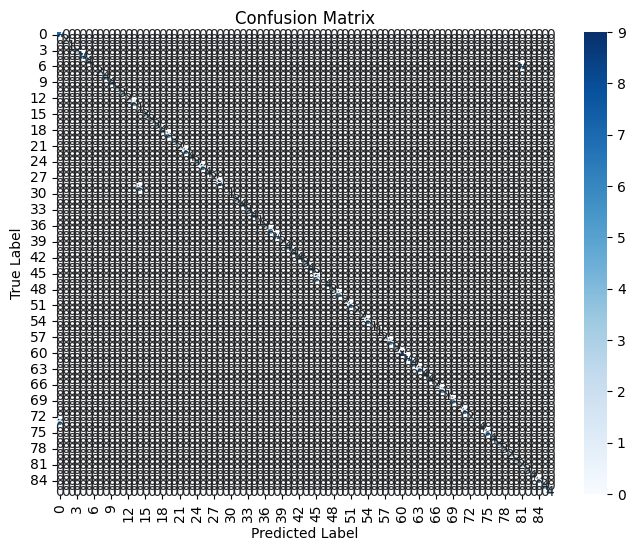

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


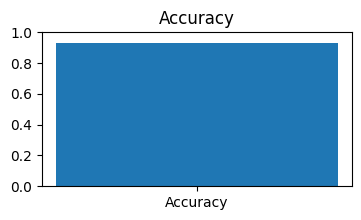

In [ ]:
# Visualize the accuracy
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(4, 2))
plt.bar(['Accuracy'], [accuracy])
plt.title('Accuracy')
plt.ylim([0, 1])
plt.show()

In [ ]:
pipe = Pipeline([('vectorizer', cv), ('multinomialNB', model)])
pipe.fit(X_train, y_train)
y_pred2 = pipe.predict(X_test)
ac2 = accuracy_score(y_test, y_pred2)
print("Accuracy is :",ac2)
with open('trained_pipeline-0.1.0.pkl','wb') as f:
    pickle.dump(pipe, f)

Accuracy is : 0.9298780487804879


In [ ]:
text="How did you write about it"
text="Is you name manish ?"
y = pipe.predict([text])
le.classes_[y[0]], y

('तेरो नाम का है?', array([46]))